## Introduction

'Reduce the size of the network using a method such as the island method described in chapter 4 of social network analysis.
What can you infer about each of the distinct groups?'

Blah blah -- little bit about thedata set and emphaizimng how it is a bipartite network

Load required libraries:

In [1]:
import pandas as pd
# import numpy as np
# import math
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
import networkx.algorithms.bipartite as bp

The data set is a CSV, load it:

In [2]:
df = pd.read_csv('rec-amz-Office-Products.edges', header=None,
                 names=['user_id', 'product_id', 'rating', 'timestamp'])
df.head()

,user_id,product_id,rating,timestamp
0,A2UESEUCI73CBO,0078800242,5.0,1374192000
1,A3BBNK2R5TUYGV,0113000316,5.0,1359417600
2,A5J78T14FJ5DU,0113000316,3.0,1318723200
3,A2P462UH5L6T57,043928631X,5.0,1356912000
4,A2E0X1MWNRTQF4,0439340039,1.0,1379721600


Now convert to a bipartite graph network:

In [3]:
# Break into components
edges = df[['user_id', 'product_id']].values.tolist()
nodes_0 = list(set(df['user_id'].values.tolist()))
nodes_1 = list(set(df['product_id'].values.tolist()))

In [4]:
nodes_1[0:5]

['B00DYQJT90', 'B0006HX7B6', 'B008AK2V22', 'B002ZX9PC4', 'B008UR00Y6']

In [11]:
# Create bipartite graph with weighted edges
g = nx.Graph()
g.add_nodes_from(nodes_0, bipartite=0) # Add the node attribute “bipartite”
g.add_nodes_from(nodes_1, bipartite=1)
g.add_edges_from(edges)
#g.add_weighted_edges_from(edges)

## Calculate adjency graphs

Next, we split up our bipartite graph into the two kinds of entitites that compose it, adjency networks:

In [12]:
user_net = bp.weighted_projected_graph(g, nodes_0[0:1], ratio=False)

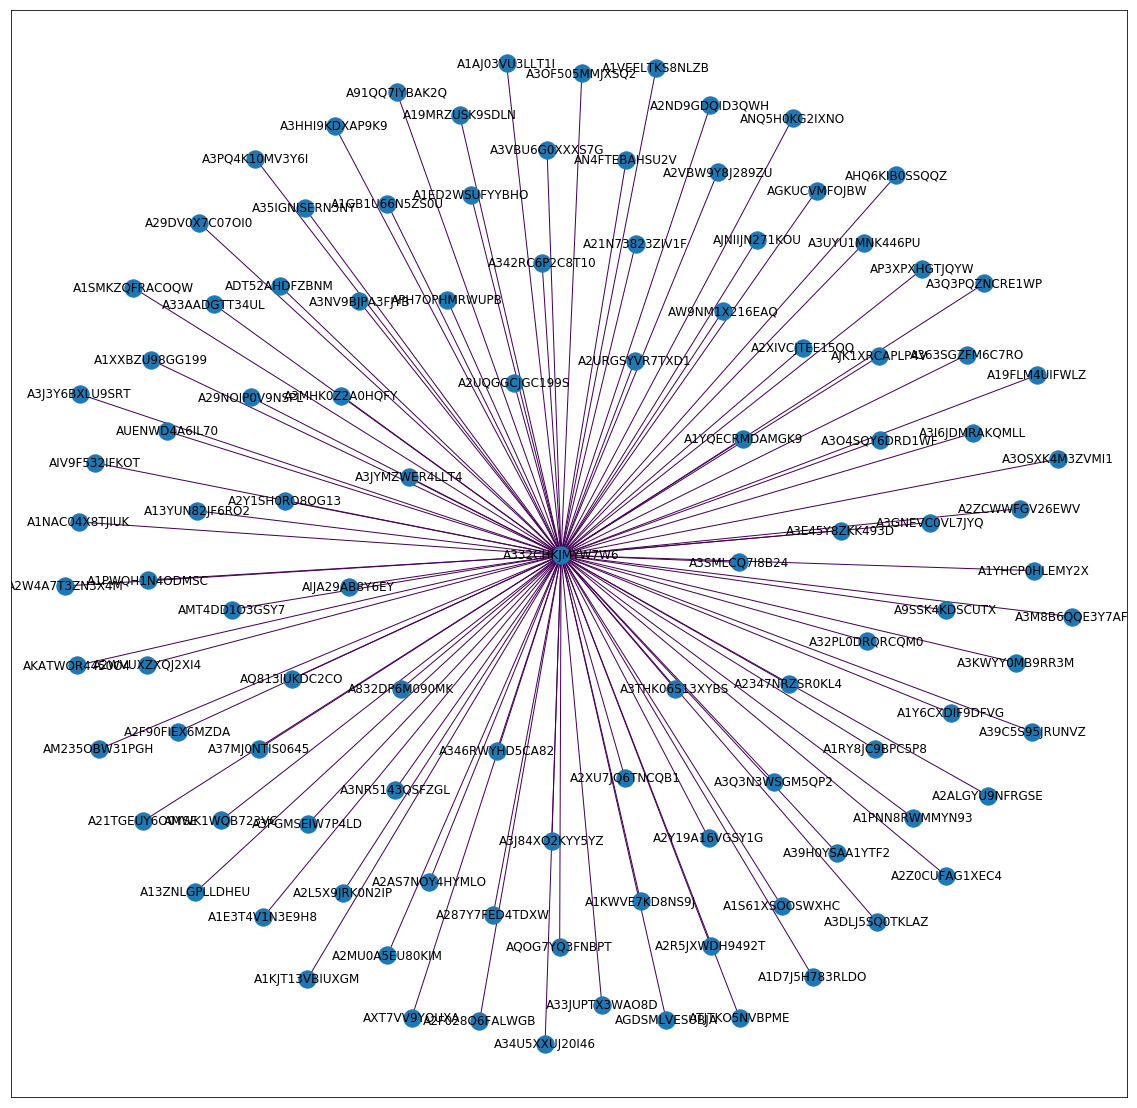

In [13]:
weights = [i[2]['weight'] for i in user_net.edges(data=True)]

len(weights)

plt.figure(figsize=(20, 20)) 
nx.draw_networkx(user_net, width=weights, edge_color=weights)
plt.show()

In [14]:
weights

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1]

## Island method

Here we'll use the island method to reveal where the most important sections of the graph are.

First, let's apply a threshold to remove lesser valued nodes:

In [ ]:
def trim_edges(g, weight=1):
    g2=nx.Graph()
    for f, to, edata in g.edges(data=True):
        if edata['weight'] > weight:
            g2.add_edge(f,to,edata)
    return g2
    
x = trim_edges(g)

## Second attempt

I'm not sure we can usethe rating for the island method. I'm going to count up all the times a user purchased an item, and use that as the weight. Maybe that will work better.

In [70]:
df = pd.read_csv('rec-amz-Office-Products.edges', header=None)
df.columns = ['user_id', 'product_id', 'rating', 'timestamp']

df1 = df.groupby(['user_id', 'product_id']).agg('count').reset_index()
df1.head()

,user_id,product_id,rating,timestamp
0,A00001483M88NBD66LEP0,B004WPCQKG,1,1
1,A0001028APITAYQ44NF3,B00006IDP4,1,1
2,A0002382258OFJJ2UYNTR,B0090684TE,1,1
3,A00031441FXF9AOR9AJK2,B000IV32JW,1,1
4,A00034361UHTFM5E7KU8Q,B004HDY822,1,1


In [72]:
x = df.groupby(['user_id', 'product_id']).size().reset_index(name='counts').sort_values(by='counts', ascending=True)
x.head()

,user_id,product_id,counts
0,A00001483M88NBD66LEP0,B004WPCQKG,1
828793,A3IVBBP65MORRO,B0062TP4PE,1
828792,A3IVB0MFC9X67C,B004E3GODQ,1
828791,A3IVAOYAPS4978,B0032AN4O4,1
828790,A3IVANT0OLRXDJ,B004KMK5T0,1
